<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Приоритизация-гипотез" data-toc-modified-id="Приоритизация-гипотез-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Приоритизация гипотез</a></span></li><li><span><a href="#Анализ-A/B-теста" data-toc-modified-id="Анализ-A/B-теста-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ A/B теста</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Проверить подготовленные гипотезы для увеличения выручки с помощью проведения A\B тестирования

**Цель исследования:**
<br>
Проверить гипотезы для увеличения выручки
- Данные о гипотезах я получу из файла `/datasets/hypothesis.csv` и проведу приоритезацию гипотез, используя фреймворки ICE и RICE
- Проведу A\B тест
- Результаты A\B теста в файлах `/datasets/orders.csv` и `/datasets/visitors.csv` 
- Проанализирую A\B тест 
- Сделаю выводы из проведенного анализа 
<br>

*Таким образом исследование пройдет в пять этапов*:
1. Обзор данных 
2. Предобработка данных
3. Приоритизация гипотез 
4. Анализ A\B теста
5. Конечный вывод исследования

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

In [2]:
try:
    df_hypotheses = pd.read_csv('/datasets/hypothesis.csv')
    df_orders = pd.read_csv('/datasets/orders.csv')
    df_visitors = pd.read_csv('/datasets/visitors.csv')
except:
    df_hypotheses = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
    df_orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
    df_visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
    

In [3]:
pd.options.display.max_colwidth = 150
df_hypotheses.info()
df_hypotheses

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
df_orders.info()
df_orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [5]:
df_visitors.info()
df_visitors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


## Предобработка данных

Для начала приведем столбцы таблиц к нижнему регистру

In [6]:
df_hypotheses.columns = df_hypotheses.columns.str.lower()
df_orders.columns = df_orders.columns.str.lower()
df_visitors.columns = df_visitors.columns.str.lower()

**Проверка на пропуски**

In [7]:
df_hypotheses.isna().sum()
pd.DataFrame(round(df_hypotheses.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
hypothesis,0.000000
reach,0.000000
impact,0.000000
confidence,0.000000
efforts,0.000000


In [8]:
df_orders.isna().sum()
pd.DataFrame(round(df_orders.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
transactionid,0.000000
visitorid,0.000000
date,0.000000
revenue,0.000000
group,0.000000


In [9]:
df_visitors.isna().sum()
pd.DataFrame(round(df_visitors.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
date,0.000000
group,0.000000
visitors,0.000000


In [10]:
df_hypotheses.duplicated().sum()

0

In [11]:
df_orders.duplicated().sum()

0

In [12]:
df_visitors.duplicated().sum()

0

Изменим тип данных в столбцах date

In [13]:
df_orders['date'] = df_orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [14]:
df_visitors['date'] = df_visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

**Вывод по предобработке**
<br>
Данные в хорошем качество. Ничего изменять не пришлось

## Приоритизация гипотез

**ICE**

In [15]:
df_hypotheses['ice'] = round(df_hypotheses['impact'] * df_hypotheses['confidence']/df_hypotheses['efforts'],2)
df_hypotheses[['hypothesis','ice']].sort_values(by='ice',ascending=False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Выпишим наиболее переспектиыне гипотезы (по индексам):
- 8 (Запустить акцию, дающую...)
- 0 (Добавить два новых канала...)
- 7 (Добавить форму подписки...)
- 6 (Показать на главной странице...)

**RICE**

In [16]:
df_hypotheses['rice'] = df_hypotheses['reach'] * df_hypotheses['impact'] * df_hypotheses['confidence']/df_hypotheses['efforts']
df_hypotheses[['hypothesis','rice']].sort_values(by='rice',ascending=False)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Выпишим наиболее переспектиыне гипотезы (по индексам):
- 7 (Добавить форму подписки...)
- 2 (Добавить блоки рекомендаций...)
- 0 (Добавить два новых канала...)
- 6 (Показать на главной странице...)

После приоритизации можно выделить 3 гипотезы:
- Гипотеза 7 
- Гипотеза 0 
- Гипотеза 6 

Все дело в параметре Reach (охват пользователей). В гипотезе 7 этот параметр высокий, поэтому он занимает первое место в RICE. На практике посчитать параметр Reach довольно тяжело. Делают это на основе уже имеющихся данных, оценки конкурентов или оценки объёмов рынка.
<br>
Приоритизация гипотез поменялась из-за параметра Reach

## Анализ A/B теста

In [17]:
df_visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [18]:
df_orders

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [19]:
print(df_visitors.query('"A" in group').count())
print(df_visitors[df_visitors['group'] == "B"].count())

date        31
group       31
visitors    31
dtype: int64
date        31
group       31
visitors    31
dtype: int64


In [20]:
print(df_orders['date'].min())
print(df_orders['date'].max())

2019-08-01 00:00:00
2019-08-31 00:00:00


In [21]:
usersB = df_orders[df_orders['group'] == "B"]
usersA = df_orders[df_orders['group'] == "A"]

In [22]:
print(usersB.pivot_table(index='group',values='visitorid',aggfunc='nunique'))
print(usersA.pivot_table(index='group',values='visitorid',aggfunc='nunique'))

       visitorid
group           
B            586
       visitorid
group           
A            503


- Как мы видим количество групп в А\В тесте одинаковое, это говорит о том, что тестирование парное
- Дата начала теста 2019-08-31, дата окончание теста 2019-08-31
- Количество пользователей по группам не одинаковое. Группы не сбалансированы

In [23]:
df_orders.groupby('visitorid').agg({'group' : 'nunique'}).query('group>1').count()

group    58
dtype: int64

In [24]:
double_users = df_orders.groupby('visitorid').agg({'group' : 'nunique'}).reset_index().query('group>1')['visitorid'].unique()

In [25]:
df_orders = df_orders.query('visitorid not in @double_users')

58 пользователей находятся одновременно в двух группах. 

In [26]:
datesGroups = df_orders[['date','group']].drop_duplicates()

In [27]:
ordersAggregated = datesGroups.apply(
    lambda x: df_orders[np.logical_and(df_orders['date'] <= x['date'], df_orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionid' : pd.Series.nunique,
'visitorid' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [28]:
visitorsAggregated = datesGroups.apply(
    lambda x: df_visitors[np.logical_and(df_visitors['date'] <= x['date'], df_visitors['group'] == x['group'])].agg({
    'date' : 'max',
    'group' : 'max', 
    'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [29]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

In [30]:
cumulativeData = cumulativeData.rename(columns={"transactionid": "orders"})
cumulativeData             #2019-08-01              #2019-08-31       

,date,group,orders,visitorid,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708
58,2019-08-30,A,460,437,3311413,18037
59,2019-08-30,B,531,511,4955833,18198
60,2019-08-31,A,468,445,3364656,18736


**График кумулятивной выручки по группам**

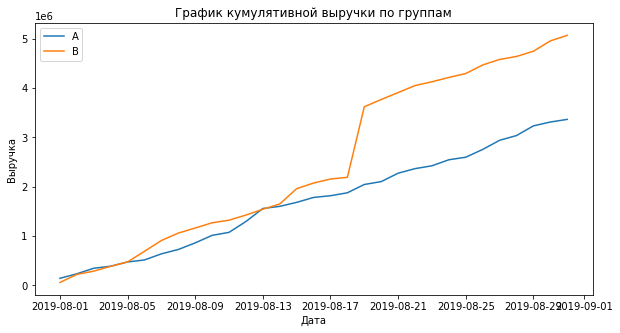

In [31]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.title('График кумулятивной выручки по группам')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.show()

***Промежуточный вывод***
<br>
После середины теста группа В значительно оторвалась по выручке. Скачок можно объяснить аномальными заказами

**График кумулятивного среднего чека по группам**

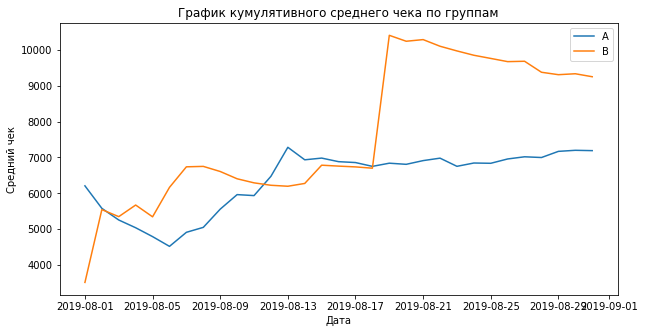

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.show()

***Промежуточный вывод***
<br>
В один момент уровень среднего чека у группы А был выше, чем у группы В. На графике видно, как у группы В наблюдается резкий скачек уровня среднего чека. Видимо в эти дни были аномальные заказы

**График относительного изменения кумулятивного среднего чека группы B к группе A**

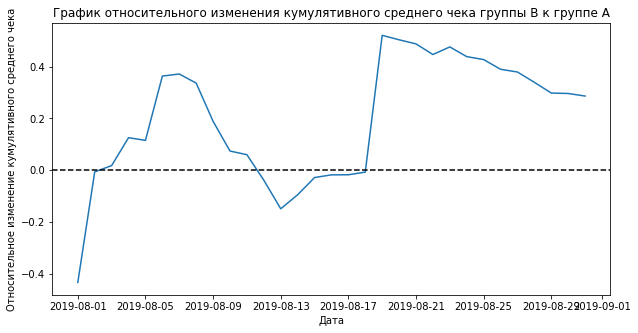

In [33]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(10, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.ylabel('Относительное изменение кумулятивного среднего чека')
plt.xlabel('Дата')
plt.show()

***Промежуточный вывод***
<br>
На графике видно, что результаты теста значительно и резко менялись в несколько дат. Видимо, именно в эти даты были аномальные заказы

**График кумулятивного среднего количества заказов на посетителя по группам**

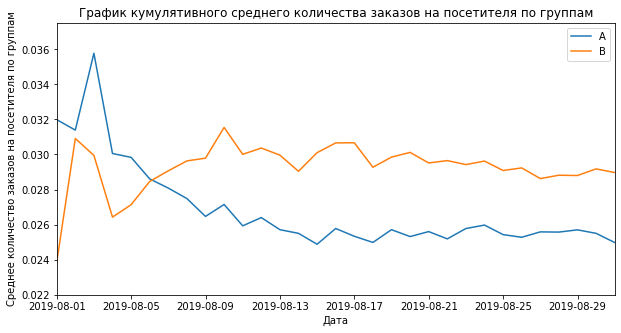

In [34]:
cumulativeData['conversion'] =  cumulativeData['orders']/cumulativeData['visitors']
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(10, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel('Среднее количество заказов на посетителя по группам')
plt.xlabel('Дата')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05])
plt.ylim(0.0220,0.0375)
plt.show()

***Промежуточный вывод***
<br>
Изначально обе группы колебались между 3% и 4%, но потом группа В зафиксировалась у значений близких к 4%, а группа А зафиксировалась на 3%

**График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A**

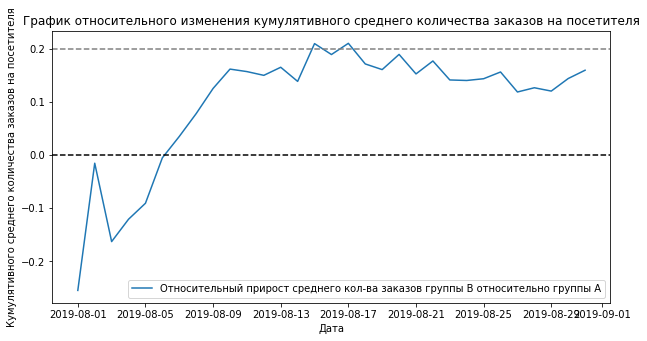

In [35]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(10, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост среднего кол-ва заказов группы B относительно группы A")
plt.legend()
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя')
plt.ylabel('Кумулятивного среднего количества заказов на посетителя')
plt.xlabel('Дата')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
#plt.axis(["2019-08-01", '2019-08-31', -0.5, 0.5])
plt.show()

***Промежуточный вывод***
<br>
Изначально группа В проигрывала по среднему количеству заказов, потом можно наблюдать резкий скачет. Потом среднее количество заказов группы В снова падала, но теперь постепенно растёт.

**Точечный график количества заказов по пользователям**

In [36]:
ordersByUsers = df_orders.groupby('visitorid', as_index=False).agg({'transactionid' : 'nunique'})
ordersByUsers.columns = ['visitorid', 'orders']

In [37]:
ordersByUsers

,visitorid,orders
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1
...,...,...
968,4259830713,1
969,4278982564,1
970,4279090005,1
971,4281247801,1


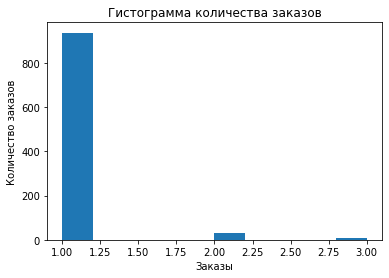

In [38]:
plt.hist(ordersByUsers['orders'])
plt.title('Гистограмма количества заказов')
plt.ylabel('Количество заказов')
plt.xlabel('Заказы')
plt.show()

Большинство пользователей совершило 1 заказ. Однако не ясно сколько пользователей совершило 2,3 и более заказов

      visitorid  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


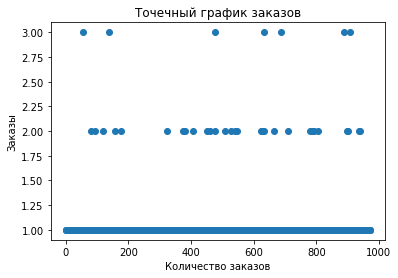

In [39]:
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Точечный график заказов')
plt.ylabel('Заказы')
plt.xlabel('Количество заказов')
plt.show()

***Промежуточный вывод***
<br>
Пользователей заказавших больше 2 раз совсем мало. Это может быть аномалией, но чтобы наверняка ответить нужно использовать перцентили

**95-й и 99-й перцентили количества заказов на пользователя**

In [40]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

***Промежуточный вывод***
<br>
Не более 5% совершило больше 2 заказов. И не более 1% совершило больше 4 заказов. Разумно выбрать верхней границей значение 2 заказа

**Точечный график стоимостей заказов**

      transactionid   visitorid       date  revenue group
425       590470918  1920142716 2019-08-19  1294500     B
1196     3936777065  2108080724 2019-08-15   202740     B
1136      666610489  1307669133 2019-08-13    92550     A
744      3668308183   888512513 2019-08-27    86620     B
743      3603576309  4133034833 2019-08-09    67990     A
1103     1348774318  1164614297 2019-08-12    66350     A
1099      316924019   148427295 2019-08-12    65710     A
949      1347999392   887908475 2019-08-21    60450     A
940      2420050534  4003628586 2019-08-08    58550     B
131      3163614039  2254586615 2019-08-22    53904     A


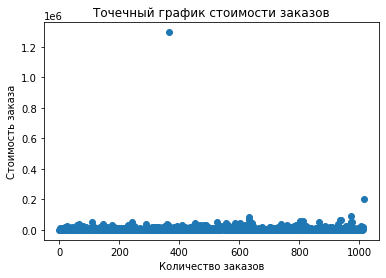

In [41]:
print(df_orders.sort_values(by='revenue', ascending=False).head(10))

x_values = pd.Series(range(0, len(df_orders['revenue'])))
plt.scatter(x_values, df_orders['revenue'])
plt.title('Точечный график стоимости заказов')
plt.ylabel('Стоимость заказа')
plt.xlabel('Количество заказов')
plt.show()

***Промежуточный вывод***
<br>
Большинство заказов стоят меньше 200.000 рублей, но есть выбросы в районе 200.000 рублей и 1.300.000 рублей (аномалия)

**95-й и 99-й перцентили стоимости заказов**

In [42]:
np.percentile(df_orders['revenue'], [95, 99])

array([26785., 53904.])

***Промежуточный вывод***
<br>
Не более 5% совершило заказов на сумму 27000 рублей. И не более 1% совершило заказов на сумму 54000 рублей. Разумно выбрать верхней границей сумму заказа 27000 рублей

**Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным**

Для проверки статистической значимости различий в среднем количестве заказов на посетителя сформулируем гипотезы:
- Н_0: различий в среднем количестве заказов на посетителя между группами нет
- H_1: различия в среднем количестве заказов на посетителя между группами есть

Будет использовать тест Манна-Уитни, потому что в данных имеются выборки

In [43]:
visitorsADaily = df_visitors[df_visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = df_visitors[df_visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    df_orders[df_orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    df_orders[df_orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

#print(data.head(5))

In [44]:
ordersByUsersA = (
    df_orders[df_orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = (
    df_orders[df_orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorid', 'orders'] 
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(df_visitors[df_visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(df_visitors[df_visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

ordersByUsersA = (
    df_orders[df_orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = (
    df_orders[df_orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorid', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                df_visitors[df_visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                df_visitors[df_visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("p-value {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительная разница {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value 0.01102
Относительная разница 0.160


***Промежуточный вывод***
<br>
p-value значительно ниже 0.05, потому отвергает нулевую гипотезу. Анализ сырых данных сообщает, что в среднем количестве заказов между группами есть статистические значимые различия.

**Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным**

Для проверки статистической значимости различий в среднем количестве заказов на посетителя сформулируем гипотезы:
- Н_0: различий в среднем чеке заказа между группами нет
- H_1: различия в среднем чеке заказов между группами есть

Будет использовать тест Манна-Уитни, потому что в данных имеются выборки

In [45]:
print('p-value {0:.3f}'.format(stats.mannwhitneyu(df_orders[df_orders['group']=='A']['revenue'], df_orders[df_orders['group']=='B']['revenue'])[1]))
print('Относительная разница {0:.3f}'.format(df_orders[df_orders['group']=='B']['revenue'].mean()/df_orders[df_orders['group']=='A']['revenue'].mean()-1))

p-value 0.829
Относительная разница 0.287


***Промежуточный вывод***
<br>
p-value больше 0.05 - статистически значимых отличий в среднем чеке между группами нет. Кроме того, относительное различие среднего чека между группами составляет 25%

**Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным**

Отделим аномальный пользователей

In [46]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 95)]['visitorid'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 95)]['visitorid'],
    ],
    axis=0,
)
usersWithExpensiveOrders = df_orders[df_orders['revenue'] > np.percentile(df_orders['revenue'], 95)]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitorid, dtype: int64


In [47]:
print("Абсолютных потерь:",abnormalUsers.count())
print("Относительных потерь:",abnormalUsers.count()/df_orders['visitorid'].nunique())

Абсолютных потерь: 86
Относительных потерь: 0.08838643371017471


In [48]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value {0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительная разница {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value 0.01593
Относительная разница 0.174


***Промежуточный вывод***
<br>
Как и в случае с сырыми данными статистическая значимость достигнута. Сегмент В лучше сегмента А

**Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным**

In [49]:
print(
    'p-value {0:.3f}'.format(
        stats.mannwhitneyu(
            df_orders[
                np.logical_and(
                    df_orders['group'] == 'A',
                    np.logical_not(df_orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            df_orders[
                np.logical_and(
                    df_orders['group'] == 'B',
                    np.logical_not(df_orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительная разница {0:.3f}".format(
        df_orders[
            np.logical_and(
                df_orders['group'] == 'B',
                np.logical_not(df_orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / df_orders[
            np.logical_and(
                df_orders['group'] == 'A',
                np.logical_not(df_orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value 0.727
Относительная разница -0.034


***Промежуточный вывод***
<br>
Статистической значимости не появилось

## Вывод

В итоге имеем:
- Есть статистически значимое различие по среднему количеству заказов на посетителя между группами как по сырым данным, так и после фильтрации аномалий.
- По сырым данным нет статистически значимого различия по среднему чеку между группами. После удаления аномалий статистически значимое различие не наблюдаем.
- График среднего чека помог выявить аномальные значения, которые влияли на результаты тестов
- Уровень среднего количества заказов у группы В имеет потенциал к росту, а также на графике заметен восходящий тренд

Исходя из фактов выше, можно останавливать A\B тест и признать победу группы В